Number of Neutrons.......................= 10

--- Starting Neutron 1 ---
  Region: 0, Group: 2, E: 1.5472e+00 MeV -> sig_f: 6.0200e-02, sig_c: 1.1000e-02, sig_s: 4.7700e-01, sig_t: 5.4820e-01
  Boundary crossing from Region 0 to 1
  Region: 1, Group: 2, E: 1.5472e+00 MeV -> sig_f: 0.0000e+00, sig_c: 2.8300e-04, sig_s: 3.4400e-01, sig_t: 3.4428e-01
  Boundary crossing from Region 1 to 2
  Region: 2, Group: 2, E: 1.5472e+00 MeV -> sig_f: 0.0000e+00, sig_c: 2.5600e-07, sig_s: 2.6500e-01, sig_t: 2.6500e-01
  Boundary crossing from Region 2 to -1
  Event: Leakage (periodic boundary condition applied)
  Region: 2, Group: 2, E: 1.5472e+00 MeV -> sig_f: 0.0000e+00, sig_c: 2.5600e-07, sig_s: 2.6500e-01, sig_t: 2.6500e-01
  Boundary crossing from Region 2 to 1
  Region: 1, Group: 2, E: 1.5472e+00 MeV -> sig_f: 0.0000e+00, sig_c: 2.8300e-04, sig_s: 3.4400e-01, sig_t: 3.4428e-01
  Boundary crossing from Region 1 to 2
  Region: 2, Group: 2, E: 1.5472e+00 MeV -> sig_f: 0.0000e+00, sig_c: 2.5600e-07

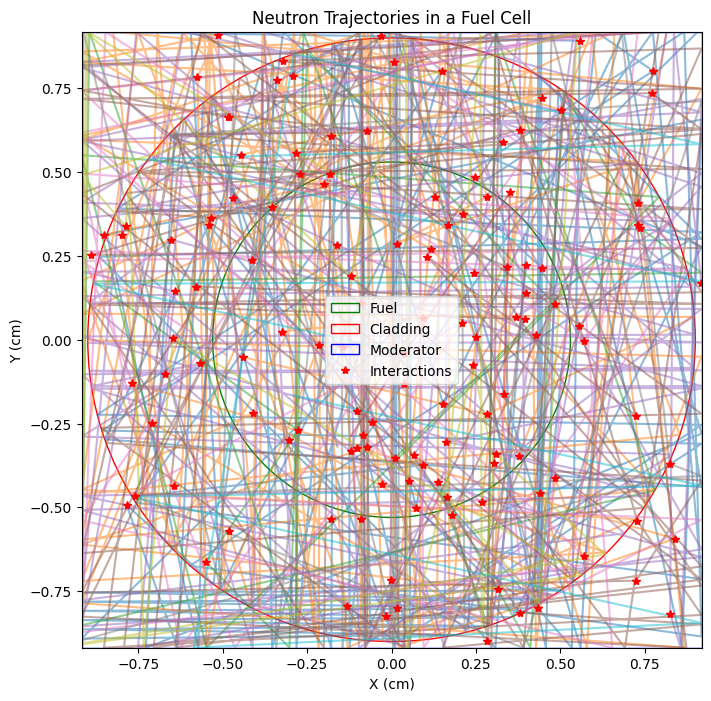


--- Simulation Results ---
Number of Neutrons.......................= 10
Total Interactions.......................= 128
  Scattering Events......................= 118
  Capture Events.........................= 1
  Fission Events.........................= 9
  Total Absorption Events................= 10
  Leakage Events.........................= 229
Neutrons Produced by Fission.............= 25
Effective Multiplication Factor (keff)...= 1.0628


C:\Users\egoem\AppData\Local\Temp\ipykernel_6804\1991988069.py:358: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  flux_y_norm = flux_y / np.trapz(flux_y, group_energy)
C:\Users\egoem\AppData\Local\Temp\ipykernel_6804\1991988069.py:359: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  watt_flux_norm = watt_flux / np.trapz(watt_flux, watt_energy)


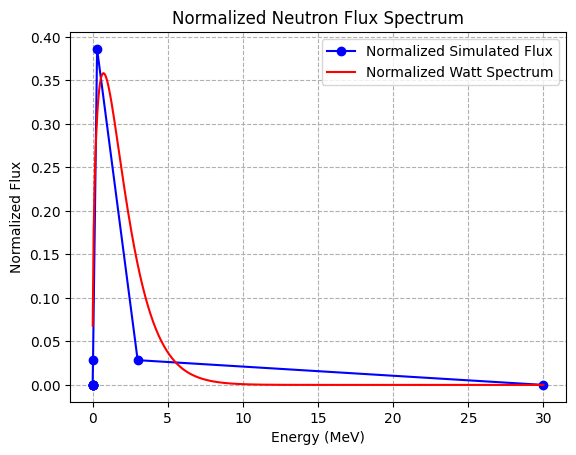

In [9]:
import math
import pylab
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

# Set a consistent random seed for reproducibility
np.random.seed()

def get_cross_sections(energy, region):
    """
    Returns the macroscopic cross sections for a given energy and region.
    The energy is mapped to one of ten energy groups.
    Units are 1/cm.
    
    Args:
        energy (float): Neutron energy in MeV.
        region (int): The material region (0: fuel, 1: cladding, 2: moderator).

    Returns:
        list: [sigma_f, sigma_c, sigma_s, sigma_t]
    """
    
    # Macroscopic cross section data
    sigma_f = np.array([[1.05e-1, 0, 0],
                        [5.96e-2, 0, 0],
                        [6.02e-2, 0, 0],
                        [1.06e-1, 0, 0],
                        [2.46e-1, 0, 0],
                        [2.50e-1, 0, 0],
                        [1.07e-1, 0, 0],
                        [1.28e+0, 0, 0],
                        [9.30e+0, 0, 0],
                        [2.58e+1, 0, 0]])
    sigma_c = np.array([[1.41e-6, 1.71e-2, 3.34e-6],
                        [1.34e-3, 7.83e-3, 3.34e-6],
                        [1.10e-2, 2.83e-4, 2.56e-7],
                        [3.29e-2, 4.52e-6, 6.63e-7],
                        [8.23e-2, 1.06e-5, 2.24e-7],
                        [4.28e-2, 4.39e-6, 1.27e-7],
                        [9.90e-2, 1.25e-5, 2.02e-7],
                        [2.51e-1, 3.98e-5, 6.02e-7],
                        [2.12e+0, 1.26e-4, 1.84e-6],
                        [4.30e+0, 3.95e-4, 5.76e-6]])
    sigma_s = np.array([[2.76e-1, 1.44e-1, 1.27e-2],
                        [3.88e-1, 1.76e-1, 7.36e-2],
                        [4.77e-1, 3.44e-1, 2.65e-1],
                        [6.88e-1, 2.66e-1, 5.72e-1],
                        [9.38e-1, 2.06e-1, 6.69e-1],
                        [1.52e+0, 2.14e-1, 6.81e-1],
                        [2.30e+0, 2.23e-1, 6.82e-1],
                        [2.45e+0, 2.31e-1, 6.83e-1],
                        [9.79e+0, 2.40e-1, 6.86e-1],
                        [4.36e+1, 2.41e-1, 6.91e-1]])
    sigma_t = sigma_f + sigma_c + sigma_s

    # Energy group boundaries (MeV)
    group_energy_boundaries = [3e+1, 3e+0, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5, 3e-6, 3e-7, 3e-8]
    
    group = 9 # Default to the lowest group if energy is below all boundaries
    for g in range(len(group_energy_boundaries)):
        if energy >= group_energy_boundaries[g]:
            group = g
            break
            
    sig_f = sigma_f[group][region]
    sig_c = sigma_c[group][region]
    sig_s = sigma_s[group][region]
    sig_t = sigma_t[group][region]
    
    print(f"  Region: {region}, Group: {group}, E: {energy:.4e} MeV -> sig_f: {sig_f:.4e}, sig_c: {sig_c:.4e}, sig_s: {sig_s:.4e}, sig_t: {sig_t:.4e}")
    return [sig_f, sig_c, sig_s, sig_t]

def get_group(energy):
    """Returns the energy group number for a given energy."""
    group_energy_boundaries = [3e+1, 3e+0, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5, 3e-6, 3e-7, 3e-8]
    group = 9
    for g in range(len(group_energy_boundaries)):
        if energy >= group_energy_boundaries[g]:
            group = g
            break
    return group

def get_material_data(region):
    """Returns material properties for a given region."""
    if region == 0:  # Fuel
        return {"name": "fuel(UO2)", "A": 238.02891, "density": 10.97}
    elif region == 1:  # Cladding
        return {"name": "cladding(Aluminium)", "A": 26.981539, "density": 2.70}
    elif region == 2:  # Moderator
        return {"name": "moderator(water)", "A": 1.00794, "density": 1}

def qualifying_monte_carlo(num_neutrons):
    """
    Monte Carlo simulation of neutron transport in a unit cell.
    
    Args:
        num_neutrons (int): The number of neutrons to simulate.
    """
    
    print(f"Number of Neutrons.......................= {num_neutrons}")
    
    # --- Geometry Parameters ---
    r_fuel = 0.53       # Fuel radius (cm)
    r_clad_in = 0.53    # Cladding inner radius (cm)
    r_clad_out = 0.90   # Cladding outer radius (cm)
    pitch = 1.837       # Cell pitch (cm)

    # --- Simulation Counters ---
    fission_count = 0
    capture_count = 0
    scattering_count = 0
    leakage_count = 0
    neutrons_produced = 0
    
    # Lists for tracking data
    interaction_point_x = []
    interaction_point_y = []
    
    # --- Neutron Initial State Generation ---
    # Maxwelian Neutron Energy Distribution [MeV]
    neutron_energies = maxwell.rvs(size=num_neutrons) 
    
    # Power-law distribution for radial position to simulate uniform fission density
    rand_r = np.random.power(2, size=num_neutrons) 
    radii = rand_r * r_fuel 
    
    # Uniform angular distribution
    thetas_initial = 2 * np.pi * np.random.random(size=num_neutrons)
    
    initial_x = radii * np.cos(thetas_initial)
    initial_y = radii * np.sin(thetas_initial)
    
    # --- Energy Group Flux Tallies ---
    fuel_surf_neu_num = np.zeros(10)
    clad_surf_neu_num = np.zeros(10)
    
    # Plot setup for trajectories
    plt.figure(figsize=(8, 8))
    plt.gcf().gca().add_artist(plt.Circle((0,0), r_fuel, fill=False, color='green', label='Fuel'))
    plt.gcf().gca().add_artist(plt.Circle((0,0), r_clad_out, fill=False, color='red', label='Cladding'))
    plt.gcf().gca().add_artist(plt.Rectangle((-pitch/2, -pitch/2), width=pitch, height=pitch, fill=False, color='blue', label='Moderator'))
    plt.xlim(-pitch/2, pitch/2)
    plt.ylim(-pitch/2, pitch/2)
    plt.title("Neutron Trajectories in a Fuel Cell")
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    
    # Main simulation loop for each neutron
    for i in range(num_neutrons):
        print(f"\n--- Starting Neutron {i+1} ---")
        
        # Initialize neutron state
        alive = True
        region = 0  # Starts in the fuel region
        x, y = initial_x[i], initial_y[i]
        energy = neutron_energies[i]
        
        # Initial direction is random
        theta = 2 * np.pi * np.random.random()
        
        path_x = [x]
        path_y = [y]
        
        while alive:
            # Get cross sections for the current state
            sig_f, sig_c, sig_s, sig_t = get_cross_sections(energy, region)
            
            # Distance to the next interaction
            d_interaction = - (1 / sig_t) * np.log(np.random.random())
            
            d_boundary = float('inf')
            next_region = region
            
            # --- Geometry Logic to find minimum distance to a boundary ---
            
            # Current squared radius
            r_sq = x**2 + y**2
            
            if region == 0:  # Fuel region
                # Distance to the outer fuel surface (r_clad_in)
                a = 1
                b = 2 * (x * np.cos(theta) + y * np.sin(theta))
                c = r_sq - r_clad_in**2
                delta = b**2 - 4*a*c
                
                if delta >= 0:
                    d_temp = (-b + np.sqrt(delta)) / (2*a)
                    if d_temp > 1e-9:
                        d_boundary = d_temp
                        next_region = 1
                        
            elif region == 1:  # Cladding region
                # Distance to the inner cladding surface (r_clad_in)
                a = 1
                b = 2 * (x * np.cos(theta) + y * np.sin(theta))
                c_in = r_sq - r_clad_in**2
                delta_in = b**2 - 4*a*c_in
                if delta_in >= 0:
                    d_temp = (-b - np.sqrt(delta_in)) / (2*a)
                    if d_temp > 1e-9:
                        d_boundary = d_temp
                        next_region = 0

                # Distance to the outer cladding surface (r_clad_out)
                c_out = r_sq - r_clad_out**2
                delta_out = b**2 - 4*a*c_out
                if delta_out >= 0:
                    d_temp = (-b + np.sqrt(delta_out)) / (2*a)
                    if d_temp > 1e-9 and d_temp < d_boundary:
                        d_boundary = d_temp
                        next_region = 2

            elif region == 2:  # Moderator region
                # Distance to the inner cladding surface (r_clad_out)
                a = 1
                b = 2 * (x * np.cos(theta) + y * np.sin(theta))
                c_out = r_sq - r_clad_out**2
                delta_out = b**2 - 4*a*c_out
                if delta_out >= 0:
                    d_temp = (-b - np.sqrt(delta_out)) / (2*a)
                    if d_temp > 1e-9:
                        d_boundary = d_temp
                        next_region = 1

                # Distance to the square cell boundaries
                distances_to_square = []
                if np.cos(theta) > 1e-9: distances_to_square.append((pitch/2 - x) / np.cos(theta))
                if np.cos(theta) < -1e-9: distances_to_square.append((-pitch/2 - x) / np.cos(theta))
                if np.sin(theta) > 1e-9: distances_to_square.append((pitch/2 - y) / np.sin(theta))
                if np.sin(theta) < -1e-9: distances_to_square.append((-pitch/2 - y) / np.sin(theta))

                for d_sq in distances_to_square:
                    if d_sq > 1e-9 and d_sq < d_boundary:
                        d_boundary = d_sq
                        next_region = -1 # Special code for leakage/wrap-around
            
            # --- Check if interaction or boundary crossing happens first ---
            
            if d_interaction < d_boundary:
                # Interaction happens inside the current region
                print(f"  Interaction in {get_material_data(region)['name']}")
                
                x += d_interaction * np.cos(theta)
                y += d_interaction * np.sin(theta)
                path_x.append(x)
                path_y.append(y)
                
                interaction_point_x.append(x)
                interaction_point_y.append(y)
                
                # Determine interaction type based on cross sections
                rnd = np.random.random()
                
                if rnd <= sig_f / sig_t:
                    print("  Event: Fission")
                    fission_count += 1
                    # Neutrons from fission
                    num_fission_neutrons = 2 if np.random.random() < 0.5 else 3
                    neutrons_produced += num_fission_neutrons
                    alive = False
                    
                elif rnd <= (sig_f + sig_c) / sig_t:
                    print("  Event: Capture")
                    capture_count += 1
                    alive = False
                    
                else:
                    print("  Event: Scattering")
                    scattering_count += 1
                    
                    # Update energy after scattering
                    material_A = get_material_data(region)['A']
                    if material_A > 1:
                        ksi = 1 + np.log((material_A - 1) / (material_A + 1)) * (material_A - 1)**2 / (2 * material_A)
                    else: # For Hydrogen (A~1), ksi is approximately 1
                        ksi = 1
                    energy *= np.exp(-ksi * np.random.random()) # Random energy loss
                    
                    # New random direction
                    theta = 2 * np.pi * np.random.random()
                    
            else:
                # Boundary crossing happens first
                
                x += d_boundary * np.cos(theta)
                y += d_boundary * np.sin(theta)
                path_x.append(x)
                path_y.append(y)
                
                # Update flux tallies
                group = get_group(energy)
                if region == 0:
                    fuel_surf_neu_num[group] += 1
                elif region == 1 and next_region == 2:
                    clad_surf_neu_num[group] += 1
                    
                print(f"  Boundary crossing from Region {region} to {next_region}")
                
                # Handle wrap-around for moderator region
                if next_region == -1:
                    leakage_count += 1
                    
                    # Periodic boundary conditions
                    if abs(x) > pitch / 2 - 1e-9: x = -x
                    if abs(y) > pitch / 2 - 1e-9: y = -y
                    print("  Event: Leakage (periodic boundary condition applied)")
                    
                    # Neutron direction is maintained after crossing boundary
                    region = 2 # Re-enter moderator region
                    
                else:
                    region = next_region
                    
        # Plot the neutron's path
        plt.plot(path_x, path_y, '-', alpha=0.5)

    plt.plot(interaction_point_x, interaction_point_y, '*r', label='Interactions')
    plt.legend()
    plt.savefig("neutron_paths.png", dpi=300)
    plt.show()

    # --- Results and Final Plotting ---
    absorption_count = fission_count + capture_count
    total_interactions = scattering_count + absorption_count
    
    # Effective multiplication factor (k_eff)
    if total_interactions > 0:
        keff = (neutrons_produced + leakage_count) / (absorption_count + leakage_count)
    else:
        keff = 0
        
    print("\n--- Simulation Results ---")
    print(f"Number of Neutrons.......................= {num_neutrons}")
    print(f"Total Interactions.......................= {total_interactions}")
    print(f"  Scattering Events......................= {scattering_count}")
    print(f"  Capture Events.........................= {capture_count}")
    print(f"  Fission Events.........................= {fission_count}")
    print(f"  Total Absorption Events................= {absorption_count}")
    print(f"  Leakage Events.........................= {leakage_count}")
    print(f"Neutrons Produced by Fission.............= {neutrons_produced}")
    print(f"Effective Multiplication Factor (keff)...= {keff:.4f}")
    
    # --- Flux Spectrum Plotting (Normalized) ---
    
    group_energy = [3e+1, 3e+0, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5, 3e-6, 3e-7, 3e-8]
    fuel_area = np.pi * r_fuel**2
    scaling_factor = 10 * num_neutrons
    
    # Simulated Flux
    flux_y = fuel_surf_neu_num / (fuel_area * scaling_factor)
    
    # Watt spectrum
    watt_energy = np.linspace(0.01, 30, 500)
    watt_flux = 0.453 * np.sinh(np.sqrt(2.29 * watt_energy)) * np.exp(-1.036 * watt_energy)
    
    # Normalization (Units are being created under the field)
    flux_y_norm = flux_y / np.trapz(flux_y, group_energy)
    watt_flux_norm = watt_flux / np.trapz(watt_flux, watt_energy)
    
    # --- Plotting ---
    plt.figure()
    plt.plot(group_energy, -flux_y_norm, '-bo', label='Normalized Simulated Flux')
    plt.plot(watt_energy, watt_flux_norm, '-r', label='Normalized Watt Spectrum')
    plt.xlabel("Energy (MeV)")
    plt.ylabel("Normalized Flux")
    plt.title("Normalized Neutron Flux Spectrum")
    plt.legend(loc='upper right')
    plt.grid(True, which="both", linestyle='--')
    #plt.xscale('log')
    plt.savefig("flux_spectrum.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    qualifying_monte_carlo(10)

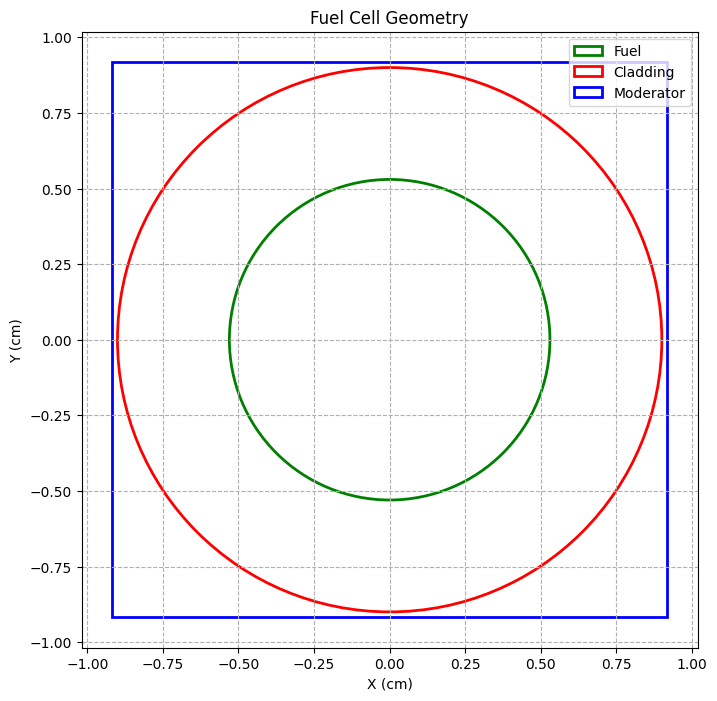

In [7]:
def plot_geometry():
    r_fuel = 0.53
    r_clad_out = 0.90
    pitch = 1.837

    fig, ax = plt.subplots(figsize=(8, 8))
    # Fuel Geometry 
    fuel_circle = plt.Circle((0, 0), r_fuel, fill=False, color='green', linewidth=2, label='Fuel')
    ax.add_artist(fuel_circle)

    # Cladding Geometry
    clad_circle = plt.Circle((0, 0), r_clad_out, fill=False, color='red', linewidth=2, label='Cladding')
    ax.add_artist(clad_circle)

    # Pitch
    mod_square = plt.Rectangle((-pitch/2, -pitch/2), pitch, pitch, fill=False, color='blue', linewidth=2, label='Moderator')
    ax.add_artist(mod_square)

    ax.set_xlim(-pitch/2 - 0.1, pitch/2 + 0.1)
    ax.set_ylim(-pitch/2 - 0.1, pitch/2 + 0.1)
    ax.set_aspect('equal')
    ax.set_title("Fuel Cell Geometry")
    ax.set_xlabel("X (cm)")
    ax.set_ylabel("Y (cm)")
    ax.legend()
    ax.grid(True, linestyle='--')
    plt.savefig("geometry.png", dpi=300)
    plt.show()
plot_geometry()    